# Question 3

Investigate the diamond dataset to uncover clustering patterns among diamonds, focusing on
features like carat weight, cut quality, color grade, and clarity grade. Your goal is to gain insights
into the likely clusters formed by diamonds based on these characteristics. To achieve this, you'll
employ the K Means algorithm to identify any inherent grouping tendencies within the dataset.

### Dataset and libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
diamonds = pd.read_csv('/Users/pierre/Downloads/Diamonds/diamonds.csv')

print(diamonds.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


### Clean the data

We look for na values.

In [6]:
print(diamonds.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


No missing values.

We encode categorical features.

In [9]:
diamonds['cut'] = diamonds['cut'].astype('category').cat.codes
diamonds['color'] = diamonds['color'].astype('category').cat.codes
diamonds['clarity'] = diamonds['clarity'].astype('category').cat.codes

We delete the first column because it is useless.

In [12]:
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [13]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### Exploratory Data Analysis

#### Pairplot

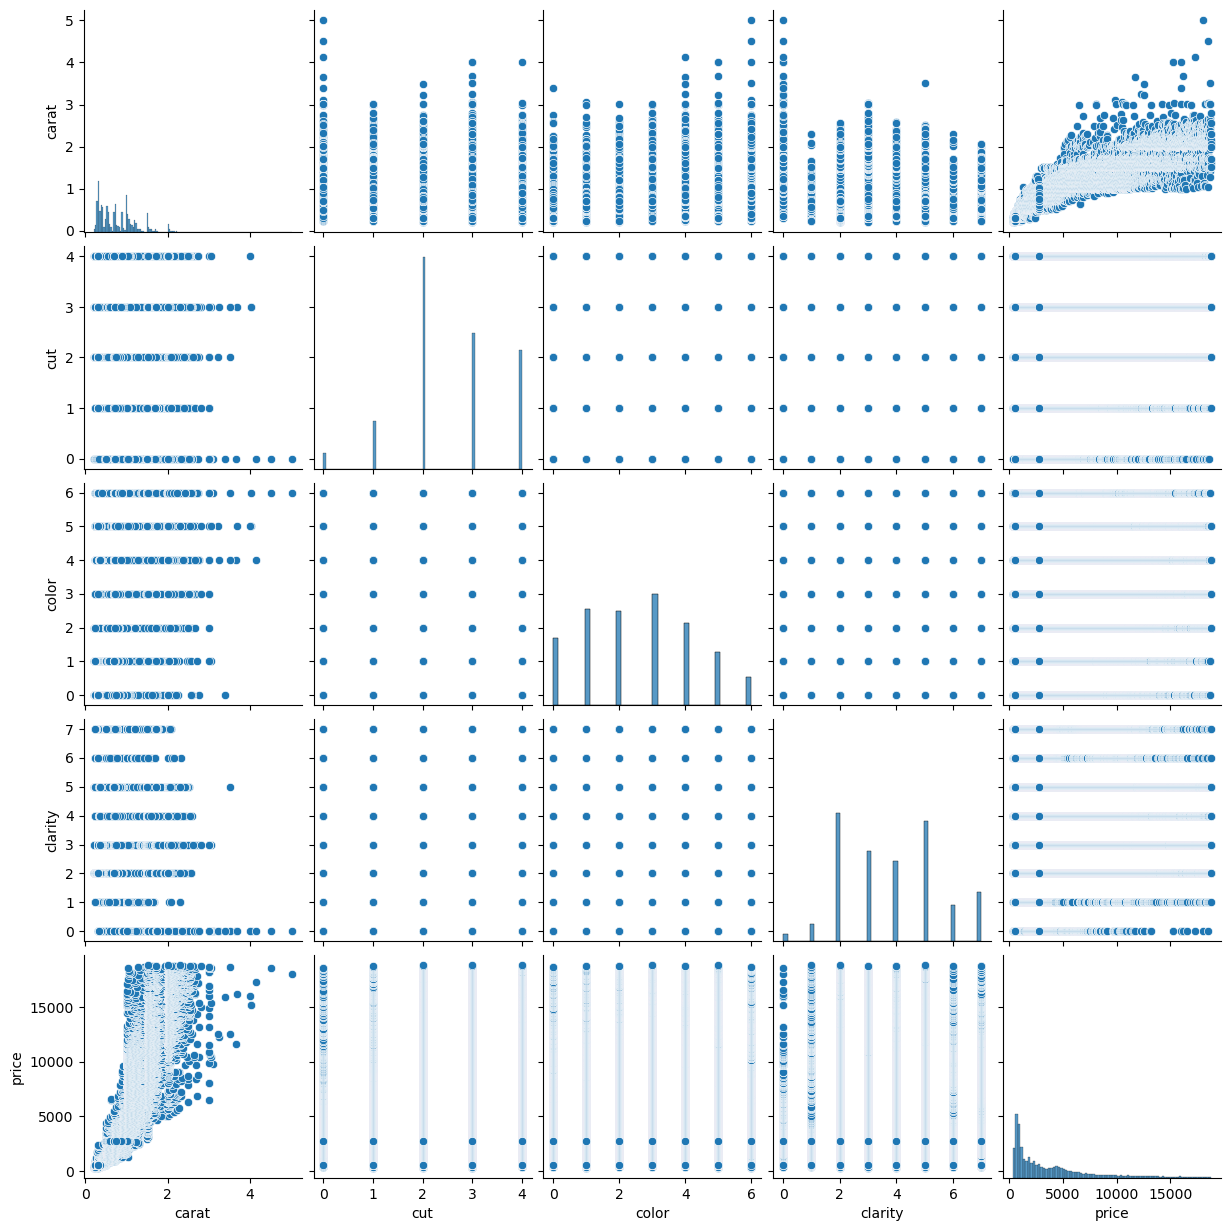

In [10]:
sns.pairplot(diamonds[['carat', 'cut', 'color', 'clarity', 'price']])
plt.show()

#### Correlation matrix

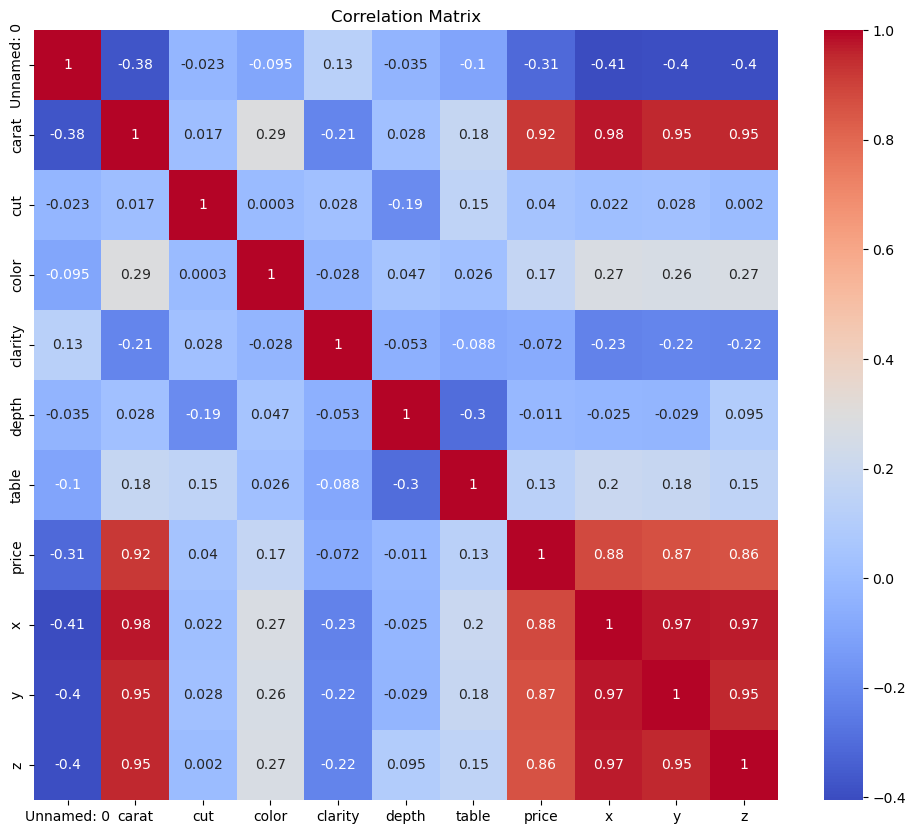

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = diamonds.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data processing

We select features for processing.

In [14]:
features = diamonds[['carat', 'cut', 'color', 'clarity']]

And standardize them.

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### K Means Clustering

We determine the optimal number of clusters using the elbow method.

In [16]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pierre/an

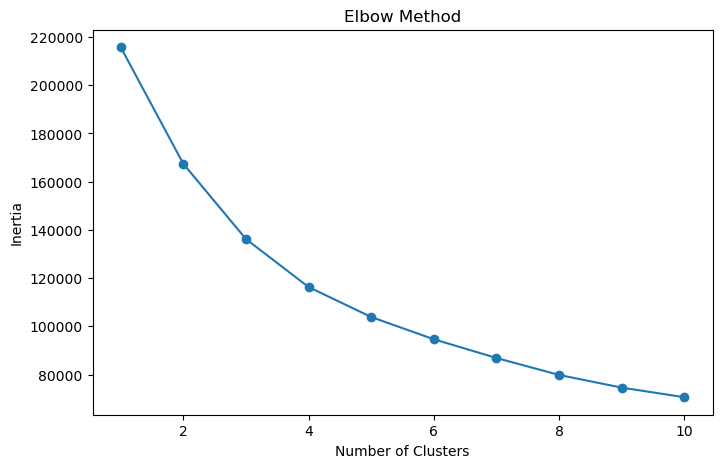

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The inertia decreases rapidly up to 4 clusters and then it is less significant so we choose 4 clusters.

In [18]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
diamonds['cluster'] = kmeans.labels_

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Model evaluation

We analyze cluster centroids.

In [19]:
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids, columns=features.columns)

print(centroids_df)

      carat       cut     color   clarity
0  0.509289  2.444753  2.442553  5.658675
1  0.696845  1.517681  2.010504  2.621201
2  1.432136  2.669291  4.376420  3.364075
3  0.733087  3.588235  1.824297  2.984027


Then the distribution of data points within each cluster.

In [20]:
cluster_distribution = diamonds['cluster'].value_counts()

print(cluster_distribution)

0    17308
3    13023
1    12442
2    11167
Name: cluster, dtype: int64


### Visualization

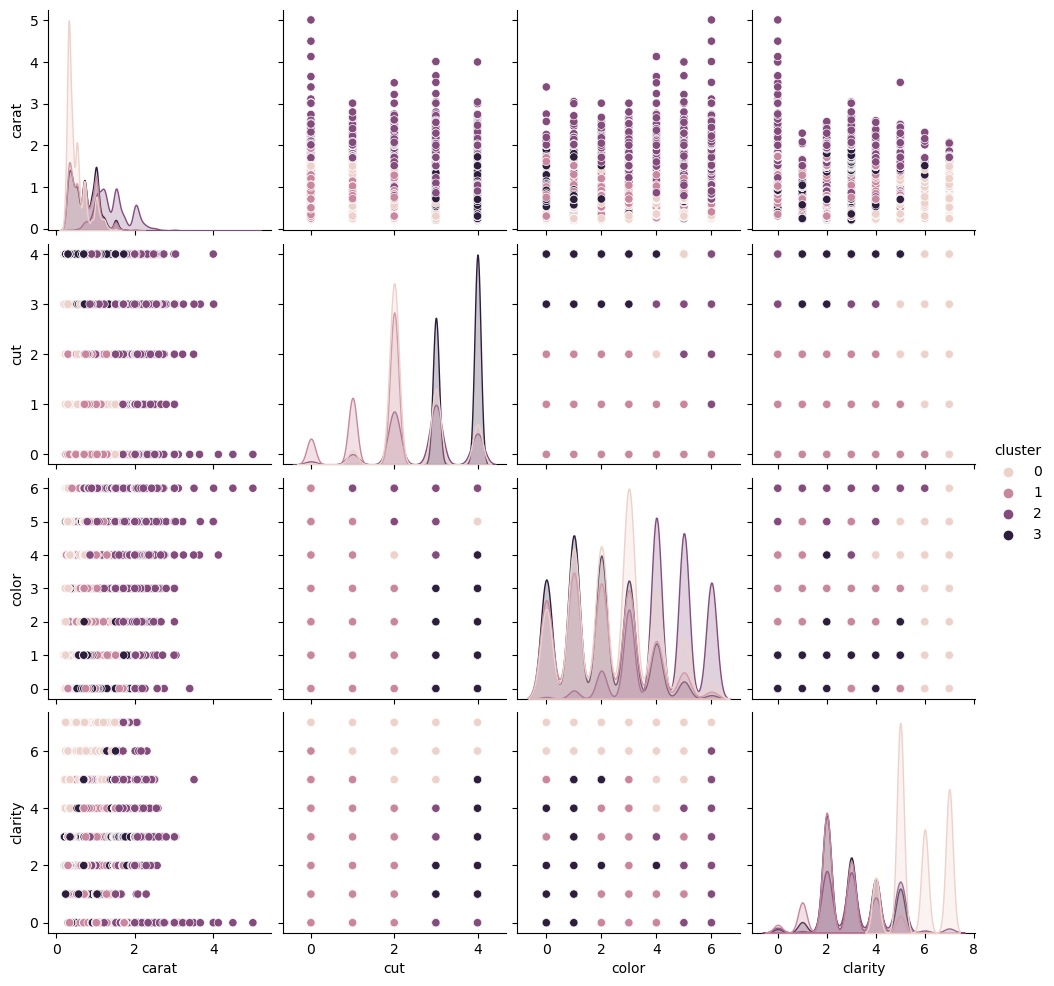

In [21]:
sns.pairplot(diamonds, hue='cluster', vars=['carat', 'cut', 'color', 'clarity'])
plt.show()

### Save the model

In [24]:
joblib.dump(kmeans, 'Diamonds_KMeans_Model.pkl')

['Diamonds_KMeans_Model.pkl']